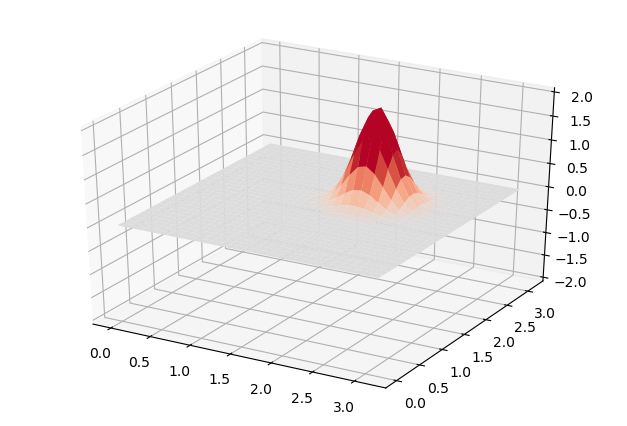

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
dx = 0.1
dy = dx
dt = 0.05
tmin = 0.0 
tmax = 6.0 #simulate time

#rectangle domain
xmin = 0.0
xmax = np.pi
ymin = 0.0
ymax = np.pi

c = 1.0 #propagation speed
rsq = (c*dt/dx)**2 #constant

nx = int((xmax-xmin)/dx) + 1
ny = int((ymax-ymin)/dy) + 1
nt = int((tmax-tmin)/dt) + 2

#mesh
X = np.linspace(xmin, xmax, nx)
Y = np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(Y, X)

#solution
u = np.zeros((nt,nx,ny))

#initial data
u_0 = np.exp(-((X-2)**2)*10)*np.exp(-((Y-2)**2)*10)*2
u_1 = np.zeros((nx,ny))
#np.sin(X)*np.sin(Y)
#np.exp(-(X**2)*10)*np.exp(-(Y**2)*10)
#np.exp(-((X-2)**2)*10)*np.exp(-((Y-2)**2)*10)

u[0] = u_0
u[1] = u[0] + dt * u_1

#simulation
for t in range(1,nt-1):
    for x in range(1,nx-1):
        for y in range(1,ny-1):
            u[t+1,x,y] = 2*(1-2*rsq)*u[t,x,y]-u[t-1,x,y]+rsq*(u[t,x-1,y]+u[t,x+1,y]+u[t,x,y-1]+u[t,x,y+1])
    
    '''
    
    #Neumann condition
    for x in range(1,nx-1):
        u[t+1,x,0] = u[t+1,x,1]
        u[t+1,x,ny-1] = u[t+1,x,ny-2]
    for y in range(1,ny-1):
        u[t+1,0,y] = u[t+1,1,y]
        u[t+1,nx-1,y] = u[t+1,nx-2,y]
    u[t,0,0] = (u[t,1,0]+u[t,0,1])/2
    u[t,nx-1,0] = (u[t,nx-2,0]+u[t,nx-1,1])/2
    u[t,0,ny-1] = (u[t,1,ny-1]+u[t,0,ny-2])/2
    u[t,nx-1,ny-1] = (u[t,nx-2,ny-1]+u[t,nx-1,ny-2])/2
    '''

fig = plt.figure()
fig.set_dpi(100)
ax = Axes3D(fig)

def animate(i):
    ax.clear()
    ax.plot_surface(X, Y, u[i], rstride=1, cstride=1, cmap=plt.cm.coolwarm,vmax=1,vmin=-1)
    ax.set_zlim(-2, 2)
    
anim = animation.FuncAnimation(fig,animate,frames=nt-1,interval=10,repeat=False)
anim.save("wave2D-N2.gif", writer="imagemagick")
plt.show()

In [ ]:
def gen_animation(filename, result, step=1):
    fig = plt.figure()
    ims = []
    res_len = result.shape[0]

    for k in range(0, res_len, step):
        im = plt.imshow(result[k,:,:], animated=True)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
    ani.save('{}.gif'.format(filename), writer="imagemagick")
    plt.show()

In [ ]:
gen_animation("hoge.gif", u)

In [14]:
X = np.arange(0,10, 2)
Y = np.arange(0, 30, 3)
X, Y = np.meshgrid(Y, X)

In [15]:
import pandas as pd
Xdf = pd.DataFrame(X)
Xdf

,0,1,2,3,4,5,6,7,8,9
0,0,3,6,9,12,15,18,21,24,27
1,0,3,6,9,12,15,18,21,24,27
2,0,3,6,9,12,15,18,21,24,27
3,0,3,6,9,12,15,18,21,24,27
4,0,3,6,9,12,15,18,21,24,27


In [16]:
Ydf = pd.DataFrame(Y)
Ydf

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,2,2,2,2,2,2,2,2,2,2
2,4,4,4,4,4,4,4,4,4,4
3,6,6,6,6,6,6,6,6,6,6
4,8,8,8,8,8,8,8,8,8,8
